Nama : Rika Ajeng Finatih

NIM : 121450036

Kelas : Pengenalan Pola RA

**Tugas:**

1. Implementasi deteksi dan pencocokan fitur dengan algoritma SURF dan SIFT.
2. Visualisasi pencocokan fitur yang berhasil antara dua gambar.
3. Lakukan analisis perbandingan antara dua algoritma ini dalam hal kecepatan, akurasi, dan robustness

# **SURF (Speeded Up Robust Features)**

SURF (Speeded Up Robust Features) adalah algoritma untuk mendeteksi dan mendeskripsikan fitur-fitur dalam sebuah gambar, yang digunakan terutama dalam bidang visi komputer, seperti pengenalan objek, pelacakan, dan pemetaan. SURF dikembangkan untuk meningkatkan kecepatan dari algoritma SIFT (Scale-Invariant Feature Transform), yang juga berfungsi untuk mendeteksi fitur gambar.

Keypoints ditemukan dalam octave [array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8), array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1]], dtype=uint8)]
Jumlah keypoints yang terdeteksi: 179016


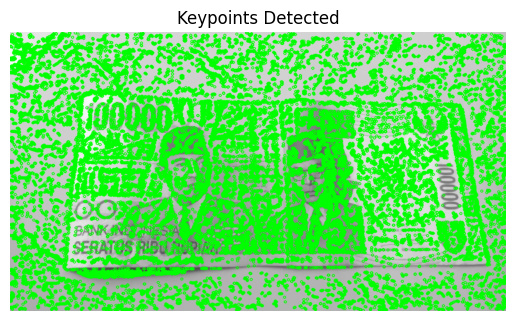

In [57]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def gaussian_blur(image, sigma):
    """Menerapkan Gaussian Blur pada gambar."""
    ksize = int(2 * np.ceil(3 * sigma) + 1)  # Ukuran kernel
    return cv2.GaussianBlur(image, (ksize, ksize), sigma)

def dog_pyramid(image, num_octaves, num_scales):
    """Membangun piramida DoG dari gambar."""
    octaves = []
    for o in range(num_octaves):
        octave = []
        for s in range(num_scales):
            sigma = 1.6 * 2**(s / num_scales)
            if s == 0:
                blurred = gaussian_blur(image, sigma)
            else:
                blurred = gaussian_blur(octave[s-1], sigma)
            octave.append(blurred)
        octaves.append(octave)

    dog = []
    for octave in octaves:
        dog_octave = []
        for i in range(len(octave) - 1):
            dog_image = cv2.subtract(octave[i + 1], octave[i])
            dog_octave.append(dog_image)
        dog.append(dog_octave)

    return dog

def detect_keypoints(dog):
    """Mendeteksi keypoints dari DoG pyramid."""
    keypoints = []
    for octave in dog:
        for i in range(1, len(octave) - 1):
            for j in range(1, octave[i].shape[0] - 1):
                for k in range(1, octave[i].shape[1] - 1):
                    # Cek apakah nilai pada titik saat ini lebih besar dari titik-titik sekitarnya
                    center = octave[i][j, k]
                    if (center > octave[i-1][j, k] and
                        center > octave[i+1][j, k] and
                        center > octave[i][j-1, k] and
                        center > octave[i][j+1, k]):
                        keypoints.append((i, j, k))
                    elif (center < octave[i-1][j, k] and
                          center < octave[i+1][j, k] and
                          center < octave[i][j-1, k] and
                          center < octave[i][j+1, k]):
                        keypoints.append((i, j, k))

    print(f"Keypoints ditemukan dalam octave {octave}")
    return keypoints

# def compute_descriptors(image, keypoints):
    """Menghitung deskriptor untuk setiap keypoint."""
    descriptors = []
    for kp in keypoints:
        i, j, k = kp
        patch = image[j-8:j+8, k-8:k+8]  # Mengambil patch sekitar keypoint
        if patch.size == 0:  # Menghindari indeks out of bounds
            continue
        descriptor = np.histogram(patch.ravel(), bins=256)[0]  # Histogram
        descriptors.append(descriptor)
    return descriptors

# Fungsi utama
def surf_manual(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # image is defined locally here

    num_octaves = 4
    num_scales = 5
    dog = dog_pyramid(image, num_octaves, num_scales)
    keypoints = detect_keypoints(dog)
    descriptors = compute_descriptors(image, keypoints)

    return keypoints, descriptors, image # return the image here


# Path gambar yang akan diproses
image_path = '/content/maxresdefault.jpg'

# Panggil fungsi dan dapatkan image
keypoints, descriptors, image = surf_manual(image_path) # get the image from return

# Tampilkan hasil
print(f"Jumlah keypoints yang terdeteksi: {len(keypoints)}")

# Tampilkan keypoints pada gambar
output_image = cv2.drawKeypoints(image, [cv2.KeyPoint(kp[2], kp[1], 8) for kp in keypoints], None, color=(0, 255, 0))
plt.imshow(output_image)
plt.title('Keypoints Detected')
plt.axis('off')
plt.show()

# **SIFT (Scale-Invariant Feature Transform)**

SIFT (Scale-Invariant Feature Transform) adalah algoritma yang digunakan untuk mendeteksi dan menggambarkan fitur dalam gambar. Ini adalah salah satu metode yang paling umum digunakan dalam visi komputer dan pemrosesan citra.

In [12]:
# Install packages
!pip install opencv-python opencv-contrib-python

Jumlah kecocokan yang baik: 269


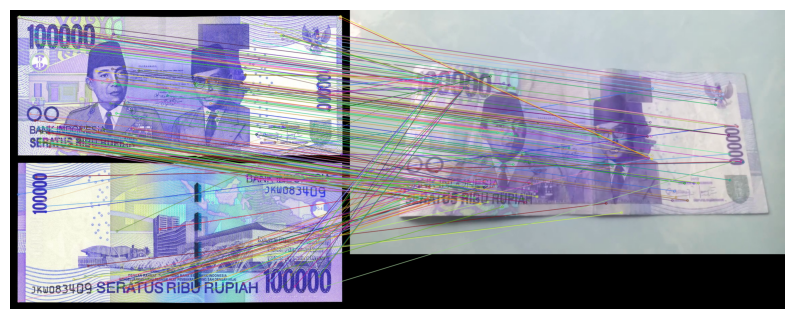

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk mendeteksi dan mengekstraksi fitur menggunakan SIFT
def sift_feature_detection(image, hessian_threshold=400):
    # Konversi gambar ke grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Inisialisasi detektor SIFT
    sift = cv2.SIFT_create()

    # Deteksi keypoints dan ekstrak deskriptor
    keypoints, descriptors = sift.detectAndCompute(gray_image, None)

    return keypoints, descriptors

# Fungsi untuk mencocokkan fitur antar gambar
def match_features(descriptors1, descriptors2):
    # Inisialisasi matcher menggunakan algoritma FLANN (Fast Library for Approximate Nearest Neighbors)
    index_params = dict(algorithm=1, trees=5)  # KD-Tree untuk SIFT
    search_params = dict(checks=50)  # jumlah iterasi dalam pencarian
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Cari kecocokan terbaik (2 nearest neighbors)
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # Simpan hanya kecocokan yang baik menggunakan rasio Lowe's test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:  # Rasio Lowe untuk kecocokan terbaik
            good_matches.append(m)

    return good_matches

# Fungsi untuk menampilkan hasil pencocokan
def draw_matches(img1, keypoints1, img2, keypoints2, matches):
    # Gabungkan dua gambar untuk menampilkan hasil pencocokan
    result_image = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, None, flags=2)

    # Tampilkan gambar hasil pencocokan
    plt.figure(figsize=(10, 10))
    plt.imshow(result_image)
    plt.axis('off')
    plt.show()

# Fungsi utama untuk mengenali gambar menggunakan SIFT
def recognize_image(image1_path, image2_path, hessian_threshold=400):
    # Baca gambar pertama
    image1 = cv2.imread(image1_path)
    if image1 is None:
        print(f"Error: Gambar pertama tidak ditemukan di {image1_path}")
        return

    # Baca gambar kedua
    image2 = cv2.imread(image2_path)
    if image2 is None:
        print(f"Error: Gambar kedua tidak ditemukan di {image2_path}")
        return

    # Deteksi dan ekstraksi fitur dari gambar pertama
    keypoints1, descriptors1 = sift_feature_detection(image1, hessian_threshold)

    # Deteksi dan ekstraksi fitur dari gambar kedua
    keypoints2, descriptors2 = sift_feature_detection(image2, hessian_threshold)

    # Cek apakah deskriptor ditemukan di kedua gambar
    if descriptors1 is None or descriptors2 is None:
        print("Tidak ada deskriptor yang ditemukan pada salah satu gambar.")
        return

    # Mencocokkan fitur antara dua gambar
    good_matches = match_features(descriptors1, descriptors2)

    print(f"Jumlah kecocokan yang baik: {len(good_matches)}")

    # Jika kecocokan yang baik ditemukan, gambarkan hasilnya
    if len(good_matches) > 0:
        draw_matches(image1, keypoints1, image2, keypoints2, good_matches)
    else:
        print("Tidak ada kecocokan yang baik ditemukan.")

# Path gambar yang akan dikenali
image1_path = '/content/Gambar 1.jpg'
image2_path = '/content/Gambar 2.jpg'

# Panggil fungsi utama untuk mengenali gambar
recognize_image(image1_path, image2_path, hessian_threshold=400)


**Analisis Hasil:**

Dari hasil yang didapatkan dengan menggunakan algoritma SURF dan SIFT, didapati bahwa SURF dapat mendeteksi jumlah keypoint pada gambar sebanyak 179016, sedangkan SIFT memiliki kecocokan yang baik dalam gambar sebanyak 269. Hal ini mengartikan bahwa meskipun SURF mampu mendeteksi lebih banyak keypoint, kualitas dan kecocokan dari keypoint yang dihasilkan oleh SIFT lebih terjamin. Dalam hal ini, program yang digunakan dalam implementasi SURF menggunakan fungsi manual yang sesuai dengan langkah-langkah algoritma SURF, sedangkan SIFT memanfaatkan library yang sudah ada pada OpenCV. Penggunaan library ini mempermudah proses deteksi dan pencocokan keypoints, tetapi juga mengurangi fleksibilitas dalam penyesuaian algoritma. Di sisi lain, karena algoritma SURF memiliki hak paten, upaya untuk mengimplementasikannya secara manual menjadi solusi yang diperlukan untuk menghindari pelanggaran hak cipta. Proses manual ini mencakup langkah-langkah seperti membangun Gaussian Pyramid dan Difference of Gaussian (DoG) secara terperinci, yang memungkinkan pemahaman yang lebih mendalam tentang cara kerja SURF, meskipun mungkin tidak seefisien implementasi menggunakan library. Dengan demikian, meskipun SURF unggul dalam jumlah keypoint yang terdeteksi, SIFT tetap menjadi pilihan yang lebih baik dalam hal kualitas dan akurasi pencocokan, terutama dalam aplikasi yang membutuhkan kehandalan tinggi. Dari segi kecepatan, SURF (Speeded-Up Robust Features) dirancang untuk lebih cepat dibandingkan SIFT, berkat penggunaan filter Haar wavelet yang mempercepat proses deteksi, sehingga lebih sesuai untuk aplikasi real-time. Sebaliknya, SIFT, meskipun akurat, cenderung lebih lambat karena penghitungan yang lebih kompleks, membuatnya kurang optimal untuk pemrosesan cepat. Dalam hal akurasi, SURF dapat mendeteksi banyak keypoint, tetapi tidak semua keypoint tersebut memiliki tingkat kecocokan yang sama, berpotensi menyebabkan false positives yang lebih tinggi. SIFT, di sisi lain, biasanya memberikan akurasi lebih tinggi dalam mencocokkan keypoints di antara gambar berkat proses normalisasi dan metode pencocokan yang lebih robust. Mengenai robustness, SURF lebih tahan terhadap perubahan pencahayaan dan rotasi, tetapi kurang efektif dalam kondisi dengan noise tinggi atau distorsi parah. Sementara itu, SIFT dikenal memiliki ketahanan yang sangat baik terhadap perubahan dalam skala, rotasi, dan distorsi perspektif, memberikan hasil yang lebih konsisten meskipun lebih lambat. Kesimpulannya, pemilihan antara SURF dan SIFT tergantung pada kebutuhan spesifik aplikasi; SURF lebih baik untuk kecepatan dan jumlah keypoint, sementara SIFT lebih unggul dalam akurasi dan ketahanan terhadap perubahan yang kompleks.







